
# Demonstration of k-means assumptions


This example is meant to illustrate situations where k-means will produce
unintuitive and possibly unexpected clusters. In the first three plots, the
input data does not conform to some implicit assumption that k-means makes and
undesirable clusters are produced as a result. In the last plot, k-means
returns intuitive clusters despite unevenly sized blobs.



Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Unevenly Sized Blobs')

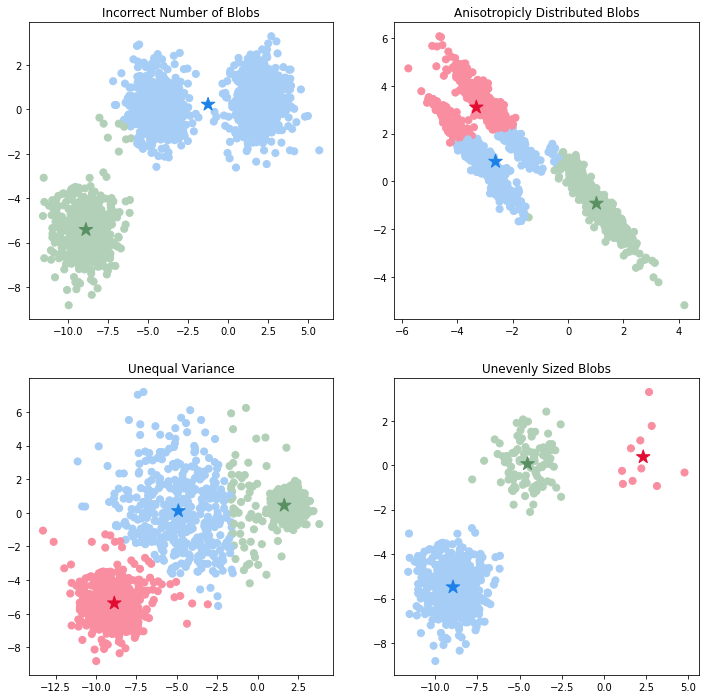

In [1]:
print(__doc__)

# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

# define the color palettes
data_colors = ['#a6cdf6','#b2d0b7','#f98ea1']
background_cmap3 = ListedColormap(['#a6cdf6','#b2d0b7','#f98ea1'])
centroid_colors = ['#1b80e8','#599062','#e20c32']
centroid_cmap = ListedColormap(centroid_colors)
plt.register_cmap(cmap=background_cmap3)
# plt.register_cmap(cmap=dots_cmap)


plt.figure(figsize=(12, 12))
n_samples = 1500
random_state = 170

###############################################
# Incorrect number of clusters
###############################################
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

model = KMeans(n_clusters=2, random_state=random_state).fit(X)
y_pred = model.predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], s=50, c=[data_colors[y] for y in y_pred], cmap=background_cmap3)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='*', s=200, c=centroid_colors[:len(model.cluster_centers_)], cmap=centroid_cmap)
plt.title("Incorrect Number of Blobs")


###############################################
# Anisotropicly distributed data
###############################################

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

model = KMeans(n_clusters=3, random_state=random_state).fit(X_aniso)
y_pred = model.predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], s=50, c=[data_colors[y] for y in y_pred], cmap=background_cmap3)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='*', s=200, c=centroid_colors[:len(model.cluster_centers_)], cmap=centroid_cmap)
plt.title("Anisotropicly Distributed Blobs")

###############################################
# Different variance
###############################################

X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
model = KMeans(n_clusters=3, random_state=random_state).fit(X_varied)
y_pred = model.predict(X_varied)

plt.subplot(223)
# plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred, cmap=dots_cmap)
plt.scatter(X_varied[:, 0], X_varied[:, 1], s=50, c=[data_colors[y] for y in y_pred], cmap=background_cmap3)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='*', s=200, c=centroid_colors[:len(model.cluster_centers_)], cmap=centroid_cmap)
plt.title("Unequal Variance")


###############################################
# Unevenly sized blobs
###############################################

X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
model = KMeans(n_clusters=3, random_state=random_state).fit(X_filtered)
y_pred = model.predict(X_filtered)

plt.subplot(224)
# plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred, cmap=dots_cmap)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], s=50, c=[data_colors[y] for y in y_pred], cmap=background_cmap3)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='*', s=200, c=centroid_colors[:len(model.cluster_centers_)], cmap=centroid_cmap)

plt.title("Unevenly Sized Blobs")

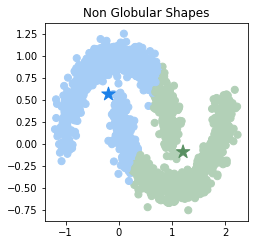

In [31]:
plt.figure(figsize=(8, 8))
n_samples = 1500
random_state = 170
X, y = make_moons(n_samples=n_samples, random_state=random_state, noise=0.1)

# Incorrect number of clusters
model = KMeans(n_clusters=2, random_state=random_state).fit(X)
y_pred = model.predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], s=50, c=[data_colors[y] for y in y_pred], cmap=background_cmap3)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='*', s=200, c=centroid_colors[:len(model.cluster_centers_)], cmap=centroid_cmap)
plt.title("Non Globular Shapes")
plt.savefig("kMeans-NonGlobularShapes-k2.png")
plt.show()


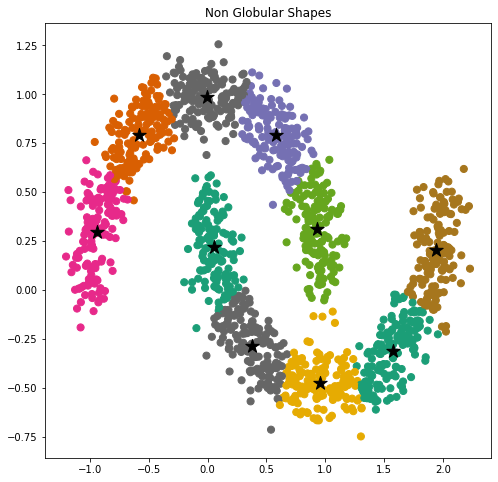

In [35]:
plt.figure(figsize=(8, 8))
n_samples = 1500
random_state = 170
X, y = make_moons(n_samples=n_samples, random_state=random_state, noise=0.1)

# Incorrect number of clusters
model = KMeans(n_clusters=10, random_state=random_state).fit(X)
y_pred = model.predict(X)

# plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], s=50, c=y_pred, cmap='Dark2')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='*', s=200, c='black',)
plt.title("Non Globular Shapes")
plt.savefig("kMeans-NonGlobularShapes-k10.png")
plt.show()


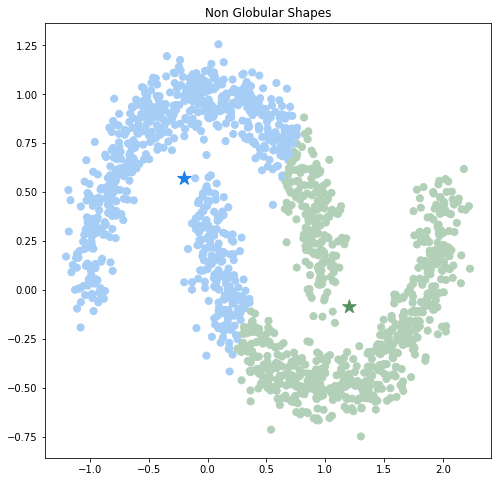

In [36]:
plt.figure(figsize=(8, 8))
n_samples = 1500
random_state = 170
X, y = make_moons(n_samples=n_samples, random_state=random_state, noise=0.1)

# Incorrect number of clusters
model = KMeans(n_clusters=2, random_state=random_state).fit(X)
y_pred = model.predict(X)

# plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], s=50, c=[data_colors[y] for y in y_pred], cmap=background_cmap3)
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='*', s=200, c=centroid_colors[:len(model.cluster_centers_)], cmap=centroid_cmap)
plt.title("Non Globular Shapes")
plt.savefig("kMeans-NonGlobularShapes-k2.png")
plt.show()